In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("car_price_dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [4]:
data.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [7]:
# Encoding categorical variables

le = LabelEncoder()

for col in data.select_dtypes(include=['object']).columns:

    data[col] = le.fit_transform(data[col])

In [8]:
data.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,6,24,2020,4.2,0,1,289944,3,5,8501
1,2,19,2012,2.0,2,0,5356,2,3,12092
2,7,16,2020,4.2,0,0,231440,4,2,11171
3,0,22,2023,2.0,1,1,160971,2,1,11780
4,9,17,2003,2.6,2,2,286618,3,3,2867


In [9]:
# Splitting dataset

X = data.drop(columns=['Price'])

Y = data['Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
# Scaling features

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [11]:
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

In [12]:
# Dictionary to store results
results = {}
# Train, evaluate, and store metrics for each model
for name, model in models.items():
    # Train model
    model.fit(X_train, Y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate metric
    mae = mean_absolute_error(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, y_pred)
    
    # Store results
    results[name] = {
        'mae':mae,
        'mse':mse,
        'rmse':rmse,
        'r2':r2
    }

In [13]:

# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results).T

# Display results
print(results_df)


                     mae            mse        rmse        r2
Decision Tree  601.04950  628028.652500  792.482588  0.931645
Random Forest  370.26852  218025.881387  466.932416  0.976270


In [14]:
# Define the best selection criteria
best_model = None
best_score = float('-inf')  # Start with the lowest possible value

# Prioritize R2 (higher is better), then MAE, MSE, RMSE (lower is better)
for model, metrics in results.items():
    score = metrics["r2"] - (metrics["mae"] / 10000)  # Weighting factors (adjust as needed)
    
    if score > best_score:
        best_score = score
        best_model = model

print(f"\nBest Model: {best_model}")


Best Model: Random Forest


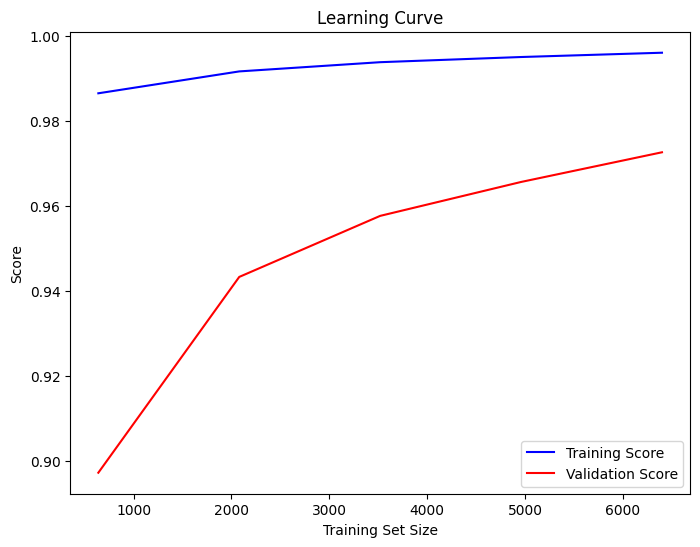

In [15]:
from sklearn.model_selection import learning_curve
# Generate learning curve, Helps detect overfitting (if training error is much lower than validation error)
train_sizes, train_scores, test_scores = learning_curve(RandomForestRegressor(), X_train, Y_train, cv=5)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label="Training Score", color='blue')
plt.plot(train_sizes, test_mean, label="Validation Score", color='red')
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend()
plt.title("Learning Curve")
plt.show()


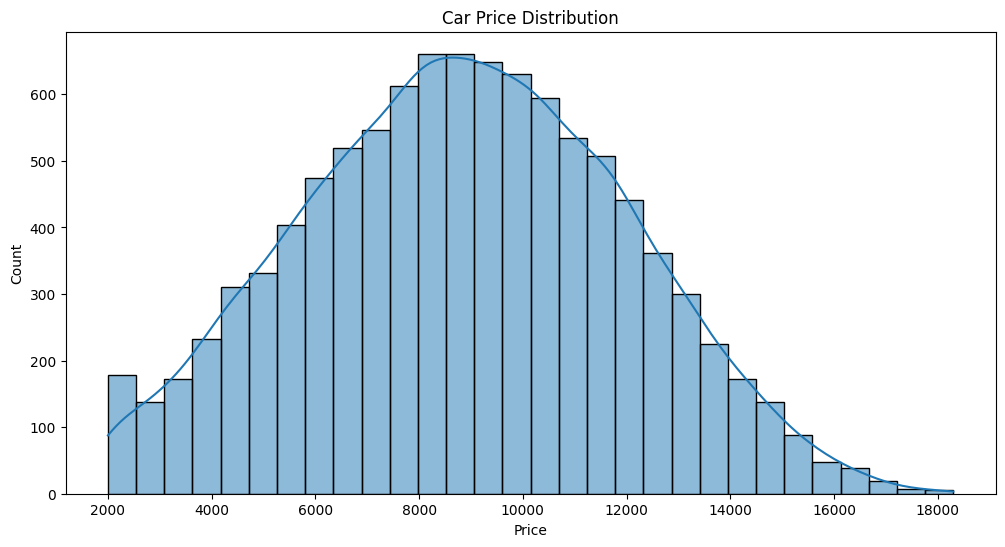

In [16]:
import seaborn as sns
plt.figure(figsize=(12, 6))

sns.histplot(Y, bins=30, kde=True)

plt.title("Car Price Distribution")

plt.show()

In [17]:
#Saving The Best Model
import joblib
joblib.dump(best_model,"CarPriceDetection.pkl")

['CarPriceDetection.pkl']

In [18]:
model= joblib.load("CarPriceDetection.pkl")